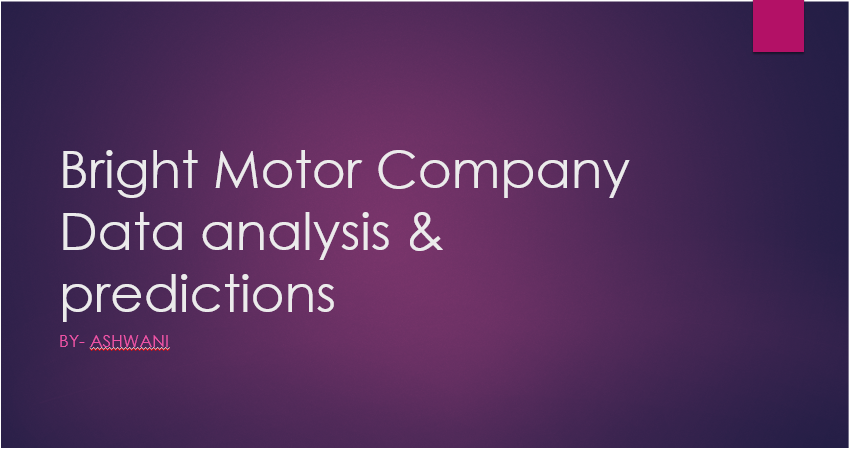

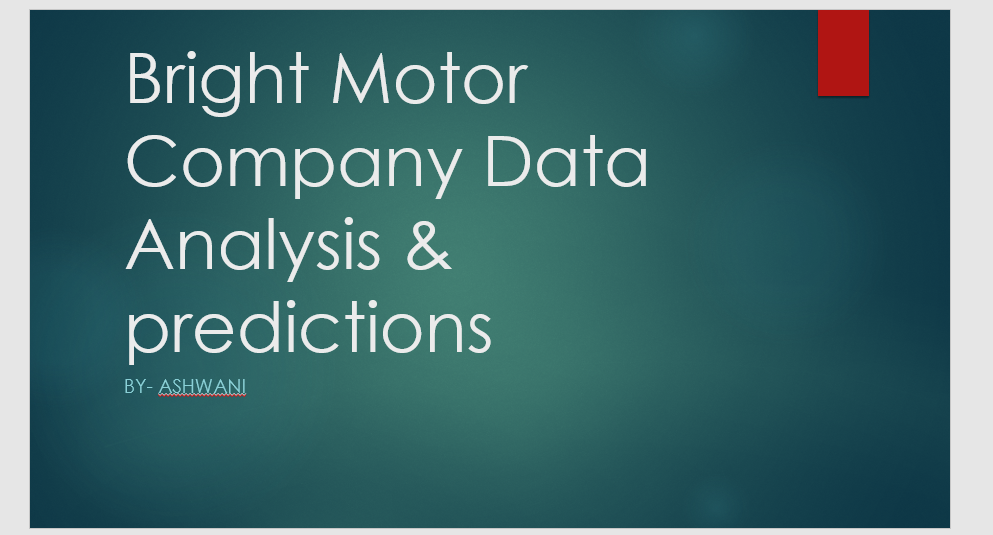

# Index
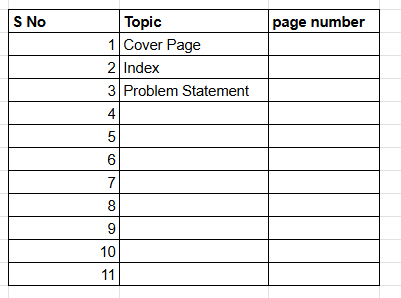


## Problem Statement:
Predicting Customer Purchase Behavior for Bright Motor Company
## Business Context:
Bright Motor Company is looking to optimize its sales strategy by understanding the profiles of individuals likely to purchase their vehicles. They also want to price their products more effectively based on the customer’s profile and financial background.

The company has collected data from previous inquiries and purchases, which includes demographic, professional, and financial attributes of individuals who interacted with their dealership. This information will be used to analyze customer behavior, predict the likelihood of a purchase, and estimate the optimal product pricing strategy.
## Project Objective:
Your objective is to help Bright Motor Company with the following:

1. Exploratory Data Analysis (EDA):
* Understand the structure of the data.
* Identify trends and relationships between customer characteristics and purchase behavior.
* Find potential data quality issues (missing values, outliers, etc.)
* Visualize how salary, profession, education, and other factors relate to car buying behavior.

2. Classification Task (Binary Classification):
* Problem: Predict whether a customer will purchase a car or not (you may use the Make or create a derived binary target like Will_Purchase = 1 if Make is not null).
* Goal: Build and evaluate classification models (e.g., Logistic Regression, Decision Trees, Random Forest, etc.) to predict customer purchase decisions based on demographic and financial features.

3. Regression Task (Predictive Modeling):
* Problem: Predict the Price of the car purchased by the customer based on their demographic and financial profile.
* Goal: Build regression models (e.g., Linear Regression, Decision Tree Regressor, etc.) to estimate the appropriate price point for a customer.

4. Model Evaluation:
* Use appropriate metrics like:
* Classification: Accuracy, Precision, Recall, F1-Score, ROC-AUC
* Regression: RMSE, MAE, R²
* Perform cross-validation and hyperparameter tuning where applicable.

5. Model Deployment (Optional if time permits):
* Deploy the classification and regression models using Flask/Streamlit to demonstrate how Bright Motor Company can use this model in real-time.
* Create a basic UI where the company can input customer data and receive purchase predictions and recommended price.

#### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading the dataset

In [2]:
df = pd.read_csv('bright_automotive_company.csv')

## 1- Basic Exploration of data
* 1.1 Checking the top 5 rows
* 1.2 Checking the shape of dataset
* 1.3 Checking the info of dataset
* 1.4 Checking the Statistical summary

#### 1.1 Checking the top 5 rows

In [151]:
print(df.columns)

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')


In [3]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,?
4,53,Male,NaN,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900,57000,SUV


###### Observations:
1. There are some values in Gender which are required to be corrected.
2. In the feature No_of_Dependents we are having wrong entries like "?".
3.

#### 1.2 Checking the shape (no.of rows and columns in dataset)

In [4]:
df.shape

(1581, 14)

###### Result:
There are _ rows and _ columns in dataset

#### 1.3 Checking the info of dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1575 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   object 
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1568 non-null   float64
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 173.1+ KB


###### Observations:
1.

In [6]:
df[df['Age']>60]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
18,120,Female,Business,Married,Post Graduate,3,No,No,Yes,92600.0,70300.0,162900,58000,SUV


#### 1.4 Statistical summary

In [7]:
df.describe()

,Age,Salary,Partner_salary,Total_salary,Price
count,1581.000000,1568.000000,1475.000000,1581.000000,1581.000000
mean,31.952562,60276.913265,20225.559322,79625.996205,35948.170778
std,8.712549,14636.200199,19573.149277,25545.857768,21175.212108
min,14.000000,30000.000000,0.000000,30000.000000,58.000000
25%,25.000000,51900.000000,0.000000,60500.000000,25000.000000
50%,29.000000,59450.000000,25600.000000,78000.000000,31000.000000
75%,38.000000,71700.000000,38300.000000,95900.000000,47000.000000
max,120.000000,99300.000000,80500.000000,171000.000000,680000.000000


###### Observations:
* 1- Partners of few customers may be home maker and not doing jobs.
* 2- We need to check the record where age is 120.
* 3- We need to check the record where age is 14.

## 2-Exploratory Data Analysis (EDA)
* 2.1 Checking the duplicate rows and fetching them
* 2.2 Checking Null Values (columnwise, percentage wise in columns and row-wise
* 2.3 Outliers Analysis
* 2.4 Univariate Analysis
* 2.5 Bivariate Analysis

#### 2.1 Checking the duplicate rows

In [8]:
# total number of duplicate rows
df.duplicated().sum()

0

In [9]:
# Fetching duplicate rows
df[df.duplicated()]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


###### Results:
1.

### 2.2 Checking Null Values

In [10]:
# Column-wise null values
df.isnull().sum()

Age                   0
Gender               53
Profession            6
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary               13
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [11]:
# Percentage wise null values in columns
df.isnull().sum()/len(df)*100

Age                 0.000000
Gender              3.352309
Profession          0.379507
Marital_status      0.000000
Education           0.000000
No_of_Dependents    0.000000
Personal_loan       0.000000
House_loan          0.000000
Partner_working     0.000000
Salary              0.822264
Partner_salary      6.704617
Total_salary        0.000000
Price               0.000000
Make                0.000000
dtype: float64

In [12]:
# row-wise null values
df.isnull().sum(axis=1).sort_values(ascending=False)

571     2
1467    2
1155    2
327     1
1244    1
       ..
561     0
560     0
559     0
558     0
1580    0
Length: 1581, dtype: int64

###### Results:


### 2.3 Outliers Analysis
* 2.3.1 Visualizing outliers
* 2.3.2 Finding the no. of outliers in each column

In [13]:
# Fetching the datasets having categorical & Numerical variables seperately
cat_variables= df.select_dtypes('object')
num_variables= df.select_dtypes(['int','float'])

##### 2.3.1 Visualizing outliers

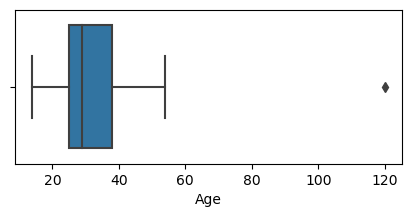

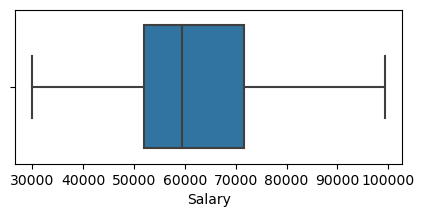

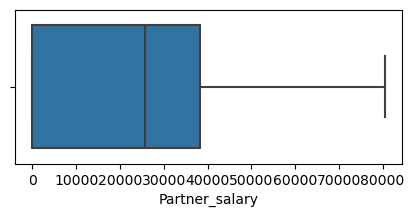

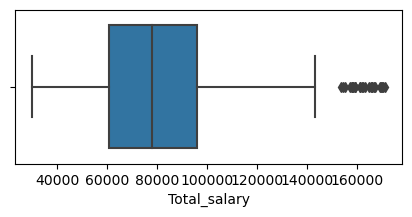

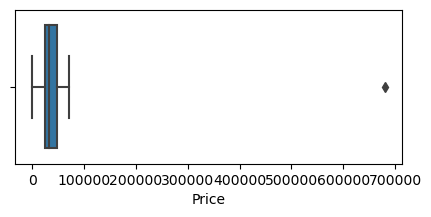

In [14]:
for i in num_variables:
    plt.figure(figsize=(5,2))
    sns.boxplot(data=df, x=i)


###### Observations:
1.
2.

##### 2.3.2 Finding the no. of outliers in each column

In [15]:
for i in num_variables:
    Q1= np.quantile(df[i],0.25)
    Q3= np.quantile(df[i],0.75)
    IQR= Q3-Q1
    lower_limit= Q1- 1.5*IQR
    upper_limit= Q3+ 1.5*IQR
    print("Number of ouliers in ",i,":", len(df[df[i]>upper_limit]))
    print('-----------------------')

Number of ouliers in  Age : 1
-----------------------
Number of ouliers in  Salary : 0
-----------------------
Number of ouliers in  Partner_salary : 0
-----------------------
Number of ouliers in  Total_salary : 27
-----------------------
Number of ouliers in  Price : 1
-----------------------


###### Results:
1.
2.

### 2.4 Univariate Analysis

##### 2.4.1. Categorical variables vizual analysis:

In [16]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,?
4,53,Male,NaN,Married,Post Graduate,3,No,No,Yes,79700.0,60200.0,139900,57000,SUV


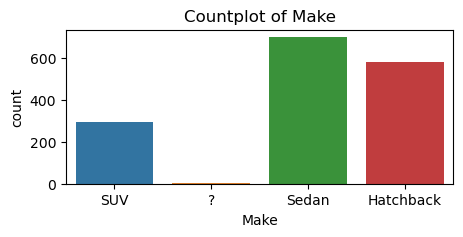

In [17]:
plt.figure(figsize=(5,2))
sns.countplot(data=df, x='Make')
plt.title('Countplot of Make');

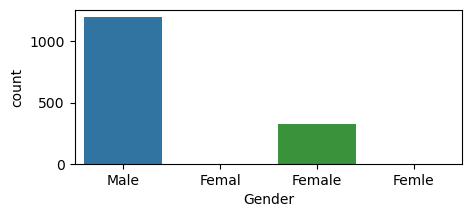

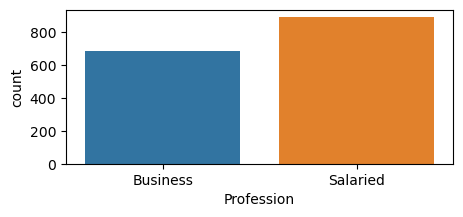

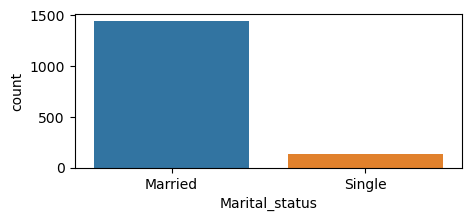

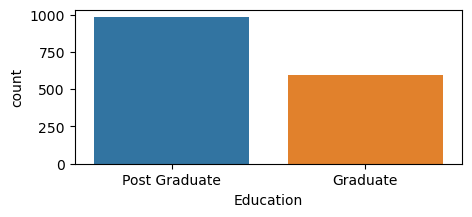

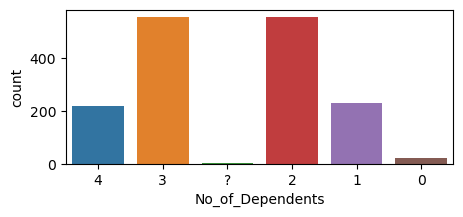

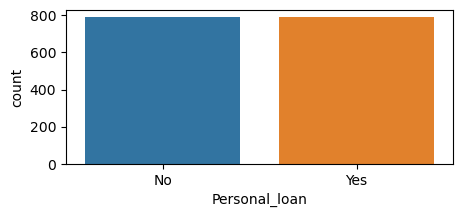

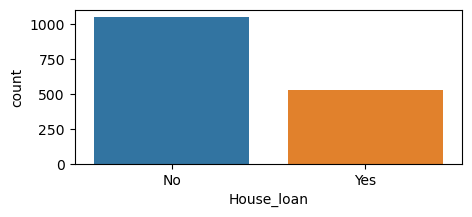

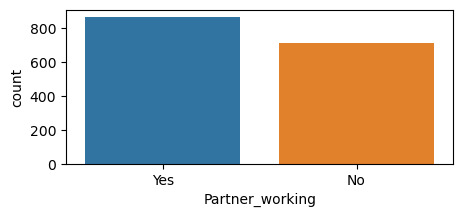

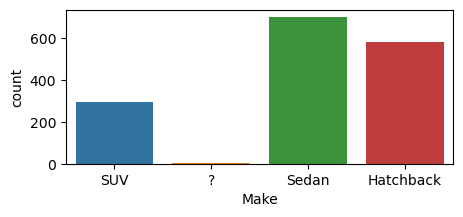

In [18]:
for i in cat_variables.columns:
    plt.figure(figsize=(5,2))
    sns.countplot(data=df, x=i)
    plt.show()

##### 2.4.2. Categorical variables numerical analysis:

In [19]:
for i in cat_variables.columns:
    print(df[i].nunique())
    print(df[i].value_counts())
    print('-------------')

4
Gender
Male      1199
Female     327
Femal        1
Femle        1
Name: count, dtype: int64
-------------
2
Profession
Salaried    890
Business    685
Name: count, dtype: int64
-------------
2
Marital_status
Married    1443
Single      138
Name: count, dtype: int64
-------------
2
Education
Post Graduate    985
Graduate         596
Name: count, dtype: int64
-------------
6
No_of_Dependents
3    557
2    556
1    229
4    217
0     20
?      2
Name: count, dtype: int64
-------------
2
Personal_loan
Yes    792
No     789
Name: count, dtype: int64
-------------
2
House_loan
No     1054
Yes     527
Name: count, dtype: int64
-------------
2
Partner_working
Yes    868
No     713
Name: count, dtype: int64
-------------
4
Make
Sedan        702
Hatchback    582
SUV          295
?              2
Name: count, dtype: int64
-------------


###### Observations:
1.
2.

##### 2.4.3. Numerical variables analysis:

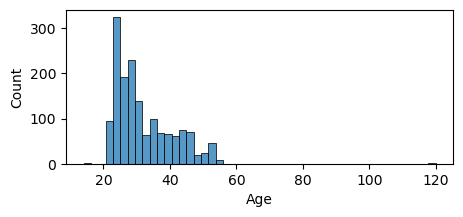

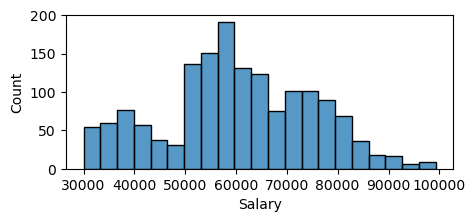

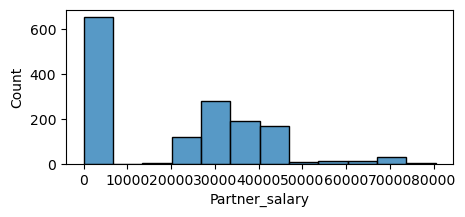

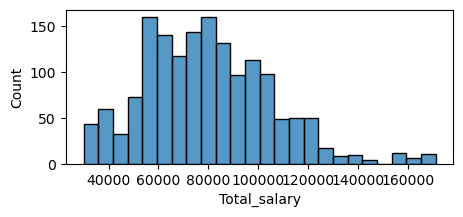

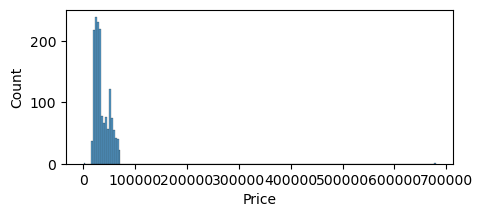

In [20]:
for i in num_variables:
    plt.figure(figsize=(5,2))
    sns.histplot(data=df,x=i);

###### Observations:
1.

### 2.5 Bi-variate analysis
* Since during model building we will be having "Price" and "Make" as our target variables so we will only do bi-variate analysis of these features only.

####  2.5.1. Relationship of  'Price' with Categorical features
* Few plots which we can use are:
    * Boxplot
    * Scatterplot
    * Barplot
    * Pointplot

##### 2.5.1.1. Numerical analysis:

In [21]:
for i in cat_variables.columns:
    print(i)
    print(df.groupby(i)['Price'].mean())
    print('--------------------')

Gender
Gender
Femal     61000.000000
Female    49305.987768
Femle     65000.000000
Male      32817.347790
Name: Price, dtype: float64
--------------------
Profession
Profession
Business    33353.284672
Salaried    37803.435955
Name: Price, dtype: float64
--------------------
Marital_status
Marital_status
Married    36184.378378
Single     33478.260870
Name: Price, dtype: float64
--------------------
Education
Education
Graduate         35907.718121
Post Graduate    35972.647716
Name: Price, dtype: float64
--------------------
No_of_Dependents
No_of_Dependents
0    28900.000000
1    42393.013100
2    36571.942446
3    32093.461400
4    37861.751152
?    61000.000000
Name: Price, dtype: float64
--------------------
Personal_loan
Personal_loan
No     37444.940431
Yes    34457.070707
Name: Price, dtype: float64
--------------------
House_loan
House_loan
No     38233.451613
Yes    31377.609108
Name: Price, dtype: float64
--------------------
Partner_working
Partner_working
No     35918.7349

##### 2.5.1.2. Visual analysis:

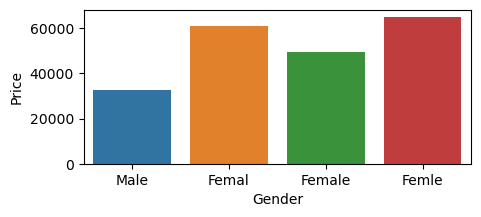

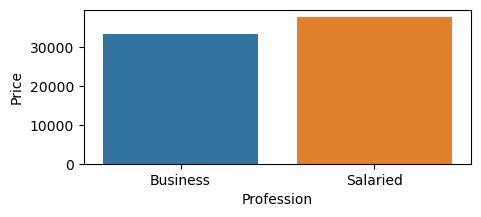

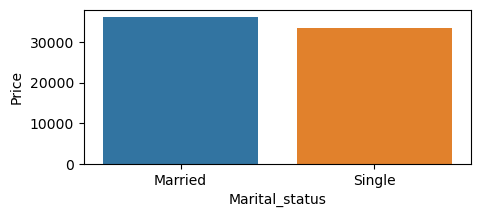

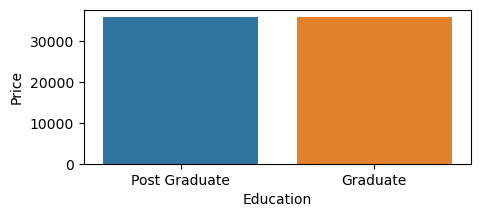

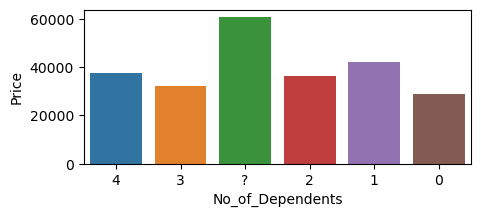

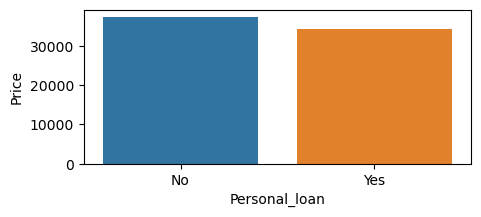

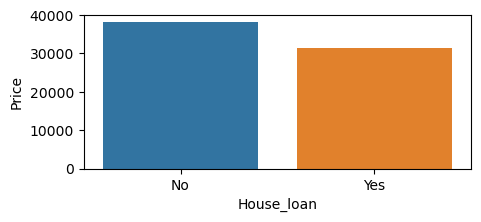

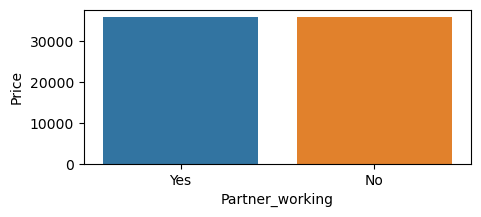

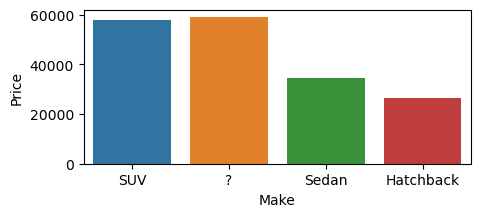

In [22]:
# barplots for Price vs all other categorical variables
for i in cat_variables.columns:
    plt.figure(figsize=(5,2))
    sns.barplot(data=df, y='Price',x=i,errorbar=None);

###### Observation:
1- Price vs Gender- Avg price of cars is hifh for females as compared to males
2-

####  2.5.2. Relationship of  'Price' with other numerical features
* Few plots which we can use are:
  * Pairplot
  * Jointplot
  * scatterplot

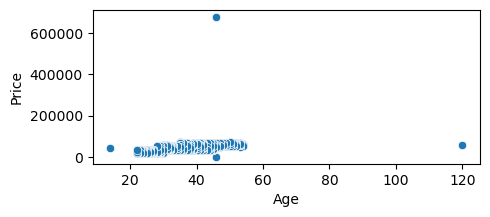

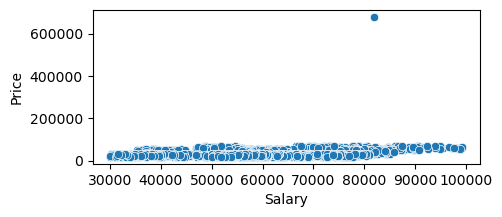

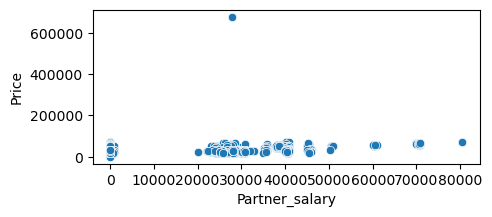

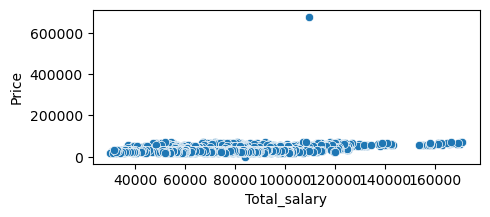

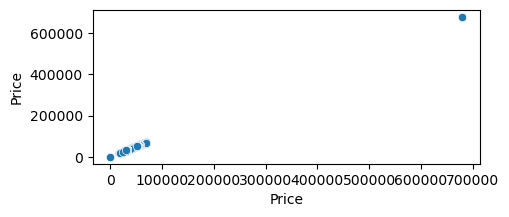

In [23]:
for i in num_variables.columns:
    plt.figure(figsize=(5,2))
    sns.scatterplot(data=df, y='Price',x=i);

##### Observations:
We cannot observe any pattern in the scatterplots which shows that there might be no correlation between price and any other numerical feature

##### Checking the correlation with heatmap to check above observation

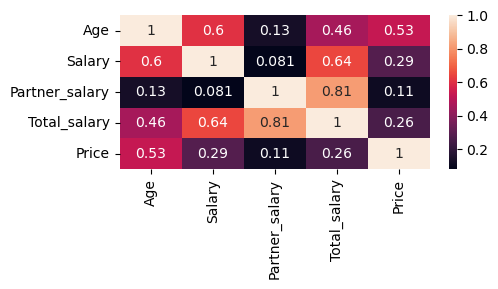

In [24]:
corr= num_variables.corr()
plt.figure(figsize=(5,2))
sns.heatmap(corr,annot=True);

##### Results:
1.

####  2.5.3 Relationship of  'Make' with all other features
* We can use following plots & tables :
    * Countplot with hue
    * crosstab
    * df.plot.bar(stacked=True)

##### 2.5.3.1 Visual analysis of "Make" with other categorical variables
    

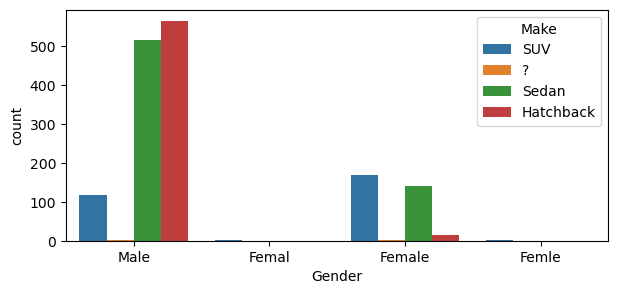

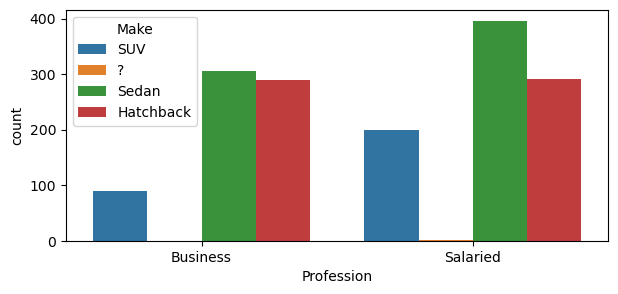

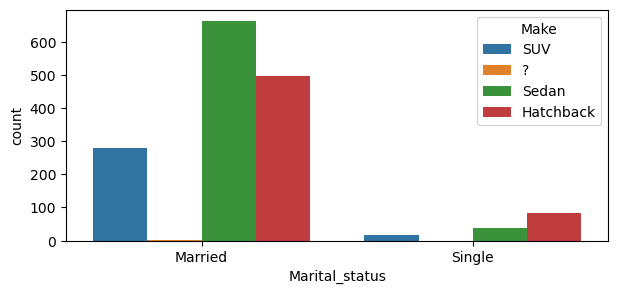

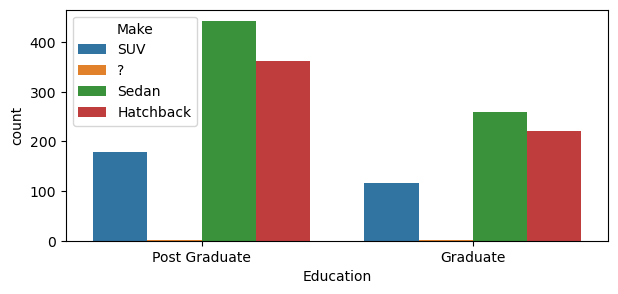

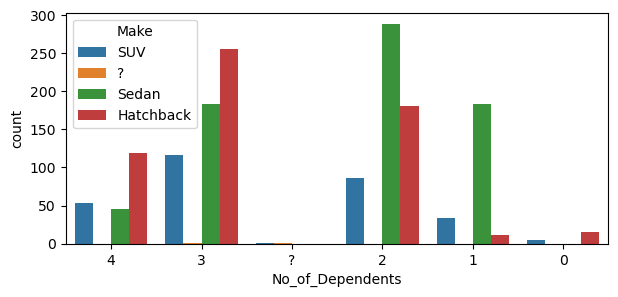

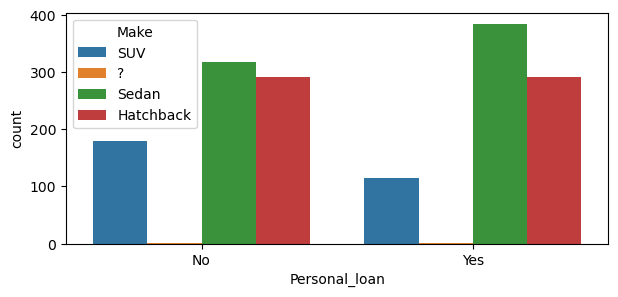

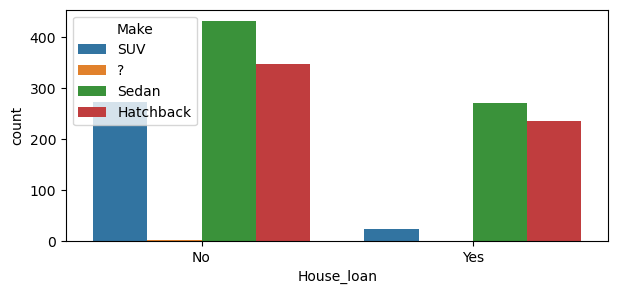

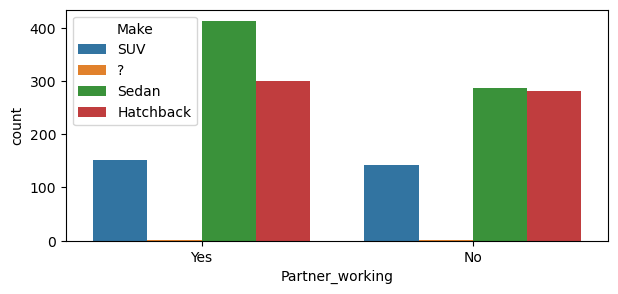

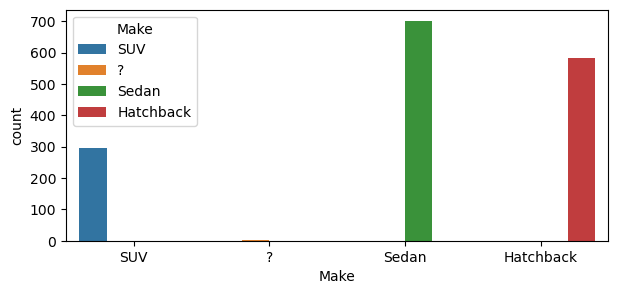

In [25]:
for i in cat_variables.columns:
    plt.figure(figsize=(7,3))
    sns.countplot(data=df, x=i, hue='Make');

###### Observations;
1.

##### 2.5.3.2 Numerical analysis of "Make" with other categorical variables

In [26]:
for i in cat_variables:
    print(pd.crosstab(df['Make'],df[i]))
    print('------------------------------')

Gender     Femal  Female  Femle  Male
Make                                 
?              0       1      0     1
Hatchback      0      15      0   565
SUV            1     170      1   117
Sedan          0     141      0   516
------------------------------
Profession  Business  Salaried
Make                          
?                  0         2
Hatchback        290       292
SUV               89       200
Sedan            306       396
------------------------------
Marital_status  Married  Single
Make                           
?                     2       0
Hatchback           498      84
SUV                 279      16
Sedan               664      38
------------------------------
Education  Graduate  Post Graduate
Make                              
?                 1              1
Hatchback       220            362
SUV             116            179
Sedan           259            443
------------------------------
No_of_Dependents   0    1    2    3    4  ?
Make            

###### Observations:

##### 2.5.3.3 Visual analysis of "Make" with other numerical variables
Use any of these plots
* 1.Boxplot
* 2.Scatterplot
* 3.Barplot
* 4.Pointplot

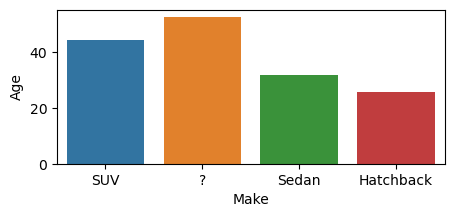

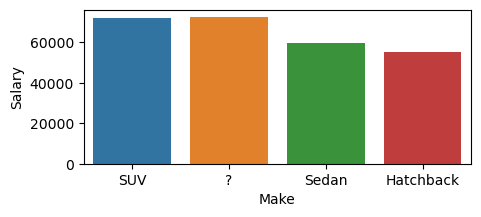

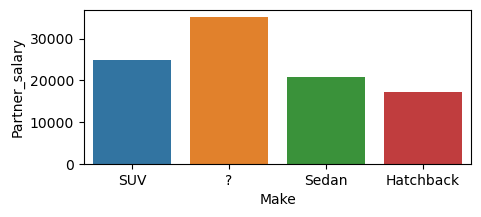

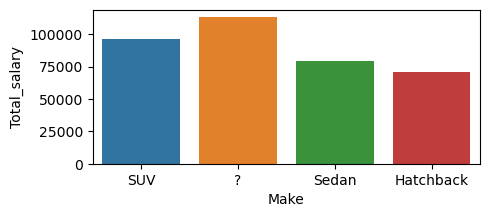

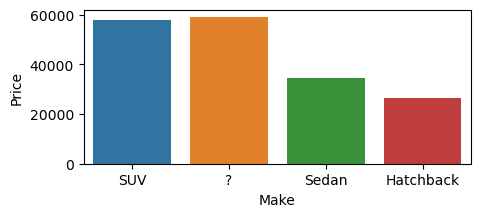

In [27]:
for i in num_variables.columns:
    plt.figure(figsize=(5,2))
    sns.barplot(data=df, x='Make', y=i,errorbar= None);

###### Observations

##### 2.5.3.4 Numerical analysis of "Make" with other numerical variables

In [28]:
for i in num_variables.columns:
    print(i)
    print(df.groupby('Make')[i].mean())
    print('--------------------')

Age
Make
?            52.500000
Hatchback    25.726804
SUV          44.172881
Sedan        31.920228
Name: Age, dtype: float64
--------------------
Salary
Make
?            72500.000000
Hatchback    55083.505155
SUV          72114.436620
Sedan        59775.463623
Name: Salary, dtype: float64
--------------------
Partner_salary
Make
?            35150.000000
Hatchback    17100.373134
SUV          24845.161290
Sedan        20767.173252
Name: Partner_salary, dtype: float64
--------------------
Total_salary
Make
?            113250.000000
Hatchback     71018.041237
SUV           96478.644068
Sedan         79584.757835
Name: Total_salary, dtype: float64
--------------------
Price
Make
?            59000.000000
Hatchback    26474.226804
SUV          57681.552542
Sedan        34603.988604
Name: Price, dtype: float64
--------------------


##### Observations:
1.

# 3- Data Cleaning & pre processing
* 0.Dropping unwanted columns
* 1.Dropping duplicate rows
* 2.Replacing wrong entries
* 3.Missing values imputation (SimpleImputer, fillna())
* 4.Handle outliers (IQR, Z-score method)
* 5.Encoding
* 6.Data splitting
* 7.Feature scaling: StandardScaler, MinMaxScaler
* 8.Feature selection:Based on correlation, domain knowledge, or model-based methods


In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('bright_automotive_company.csv')

In [145]:
df_copy= df.copy()
cat_variables= df_copy.select_dtypes('object')
num_variables= df_copy.select_dtypes(['int','float'])

#### 3.0 Dropping Unwanted columns 

* We don't have any unwanted column in our dataset

#### 3.1 Dropping duplicates

In [31]:
print(" No. of rows before dropping duplicates :", df_copy.shape[0])
df_copy.drop_duplicates(inplace=True)
print(" No. of rows after dropping duplicates :", df_copy.shape[0])

 No. of rows before dropping duplicates : 1581
 No. of rows after dropping duplicates : 1581


#### 3.2 Replacing wrong entries

##### 3.2.1 Gender

In [32]:
# Before Cleaning
print("Unique categories in feature : ",df_copy['Gender'].unique())
print("Number of Unique categories in feature : ",df_copy['Gender'].nunique())
print("Count of Unique categories in feature : ",df_copy['Gender'].value_counts())

Unique categories in feature :  ['Male' 'Femal' 'Female' nan 'Femle']
Number of Unique categories in feature :  4
Count of Unique categories in feature :  Gender
Male      1199
Female     327
Femal        1
Femle        1
Name: count, dtype: int64


In [33]:
# Replacing wrong entries
df_copy['Gender']=df_copy['Gender'].replace(['Femal','Femle'],'Female')

In [34]:
# After Cleaning
print("Unique categories in feature : ",df_copy['Gender'].unique())
print("Number of Unique categories in feature : ",df_copy['Gender'].nunique())
print("Count of Unique categories in feature : ",df_copy['Gender'].value_counts())

Unique categories in feature :  ['Male' 'Female' nan]
Number of Unique categories in feature :  2
Count of Unique categories in feature :  Gender
Male      1199
Female     329
Name: count, dtype: int64


##### 3.2.2 Make

In [35]:
# Before Cleaning
print("Unique categories in feature : ",df_copy['Make'].unique())
print("Number of Unique categories in feature : ",df_copy['Make'].nunique())
print("Count of Unique categories in feature : ",df_copy['Make'].value_counts())

Unique categories in feature :  ['SUV' '?' 'Sedan' 'Hatchback']
Number of Unique categories in feature :  4
Count of Unique categories in feature :  Make
Sedan        702
Hatchback    582
SUV          295
?              2
Name: count, dtype: int64


In [36]:
# Fetching the records where Make is "?"
df_copy[df_copy['Make']=='?']

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Yes,72500.0,70300.0,142800,61000,?
9,52,Male,Salaried,Married,Post Graduate,3,No,No,No,NaN,0.0,83700,57000,?


In [37]:
df_copy['Make']=df_copy['Make'].replace('?',df_copy['Make'].mode()[0])

In [38]:
# After Cleaning
print("Unique categories in feature : ",df_copy['Make'].unique())
print("Number of Unique categories in feature : ",df_copy['Make'].nunique())
print("Count of Unique categories in feature : ",df_copy['Make'].value_counts())

Unique categories in feature :  ['SUV' 'Sedan' 'Hatchback']
Number of Unique categories in feature :  3
Count of Unique categories in feature :  Make
Sedan        704
Hatchback    582
SUV          295
Name: count, dtype: int64


###### How to replace two same wrong entries with two seperate values

In [39]:
df_copy['Make'].value_counts()

Make
Sedan        704
Hatchback    582
SUV          295
Name: count, dtype: int64

In [40]:
df_copy[df_copy['Make']=='?']

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


In [41]:
df_copy.iat[3,8]= 'Sedan'

In [42]:
df_copy.iat[14,8]='Hatchback'

##### 3.2.3 Replacing wrong entries in No_of_Dependents

In [43]:
# Before Cleaning
print("Unique categories in feature : ",df_copy['No_of_Dependents'].unique())
print("Number of Unique categories in feature : ",df_copy['No_of_Dependents'].nunique())
print("Count of Unique categories in feature : ",df_copy['No_of_Dependents'].value_counts())

Unique categories in feature :  ['4' '3' '?' '2' '1' '0']
Number of Unique categories in feature :  6
Count of Unique categories in feature :  No_of_Dependents
3    557
2    556
1    229
4    217
0     20
?      2
Name: count, dtype: int64


In [44]:
# Fetching the rows with wrong entries
df_copy[df_copy['No_of_Dependents']=='?']

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
3,53,Female,Salaried,Married,Graduate,?,Yes,No,Sedan,72500.0,70300.0,142800,61000,Sedan
8,52,Male,Salaried,Married,Post Graduate,?,No,No,No,89400.0,0.0,89400,61000,SUV


In [45]:
# Mean of 'No_of_Dependents'
df_copy['No_of_Dependents'].drop(index=[3,8],axis=1).astype('int').mean()

2.4572514249525015

In [46]:
# Median of 'No_of_Dependents'
df_copy['No_of_Dependents'].drop(index=[3,8],axis=1).astype('int').median()

2.0

In [47]:
# Mode of 'No_of_Dependents'
df_copy['No_of_Dependents'].drop(index=[3,8],axis=1).astype('int').mode()

0    3
Name: No_of_Dependents, dtype: int64

###### Note- We cannot replace wrong entries with mean above as the No_of_Dependents should be a whole number and it can't be a decimal value.

In [48]:
# Replacing with mode
df_copy['No_of_Dependents']=df_copy['No_of_Dependents'].replace('?','3')
df_copy['No_of_Dependents']=df_copy['No_of_Dependents'].astype('int')

In [49]:
# After cleaning
df_copy['No_of_Dependents'].value_counts()

No_of_Dependents
3    559
2    556
1    229
4    217
0     20
Name: count, dtype: int64

#### 3.3 Missing values Treatment

| Acronym  | Full Form                    | Meaning                                                                        | Bias Introduced | Example                                                                        |
| -------- | ---------------------------- | ------------------------------------------------------------------------------ | --------------- | ------------------------------------------------------------------------------ |
| **MCAR** | Missing Completely At Random | The missingness has **no relation** to any data, observed or missing.          | ❌ No            | A sensor randomly fails and misses temperature readings.                       |
| **MAR**  | Missing At Random            | The missingness is **related to observed data**, not the missing value itself. | ✅ Yes (mild)    | People with higher incomes are less likely to report income, but age is known. |
| **MNAR** | Missing Not At Random        | The missingness is related to the **missing value itself**.                    | ✅ High          | People with very low income tend to skip the income question.                  |


##### Example
| Name  | Age | Income |
| ----- | --- | ------ |
| Alice | 25  | 50k    |
| Bob   | 30  | NaN    |
| Carol | NaN | 70k    |
| David | 40  | NaN    |


* MCAR: Missing income for Bob and David is due to random system error.
* MAR: Missing income depends on age (older people don't report income), but income itself doesn't influence missingness.
* MNAR: Income is missing because it's very high or very low, and people choose not to report it.

| Type | Can You Impute?                           | Need Advanced Methods?                         |
| ---- | ----------------------------------------- | ---------------------------------------------- |
| MCAR | ✅ Yes (Mean/Median Imputation)            | ❌ No                                           |
| MAR  | ✅ Yes (Advanced Imputers: KNN, Iterative) | ⚠️ Maybe                                       |
| MNAR | ❌ Not reliably                            | ✅ Yes (Model-based or domain knowledge needed) |


# Null values Treatment general guideline:
* Check the datatype of feature:
  * If datatype== Categorical ; replace null values with mode
  * If datatype== Numerical:
    * Check for outliers:
      * If outliers are present; replace null values with median
      * If outliers are NOT present; replace null values with mean

In [50]:
df.isnull().sum()

Age                   0
Gender               53
Profession            6
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary               13
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [51]:
# Filling null values using fillna- Gender, Salary

In [52]:
df_copy['Gender'].mode()[0]

'Male'

In [53]:
df_copy['Gender'] = df_copy['Gender'].fillna(df_copy['Gender'].mode()[0])

In [54]:
df_copy.isnull().sum()

Age                   0
Gender                0
Profession            6
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary               13
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

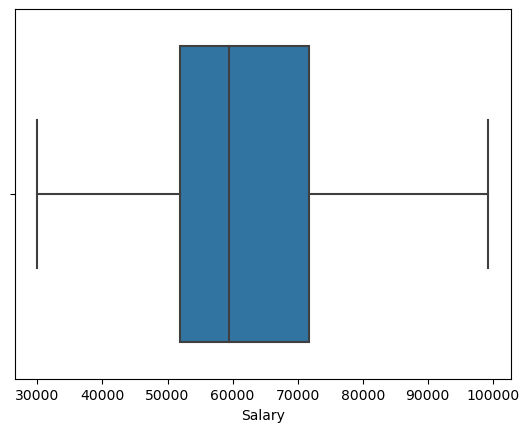

In [55]:
sns.boxplot(data=df_copy, x='Salary');

In [56]:
df_copy['Salary'] = df_copy['Salary'].fillna(df_copy['Salary'].mean())

In [57]:
df_copy.isnull().sum()

Age                   0
Gender                0
Profession            6
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [58]:
# Filling null values using simple imputer- Profession,Partner_salary

In [59]:
from sklearn.impute import SimpleImputer
# Imputer with mode strategy
imputer = SimpleImputer(strategy='most_frequent')
df_copy[['Profession']] = imputer.fit_transform(df_copy[['Profession']])

In [60]:
df_copy.isnull().sum()

Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

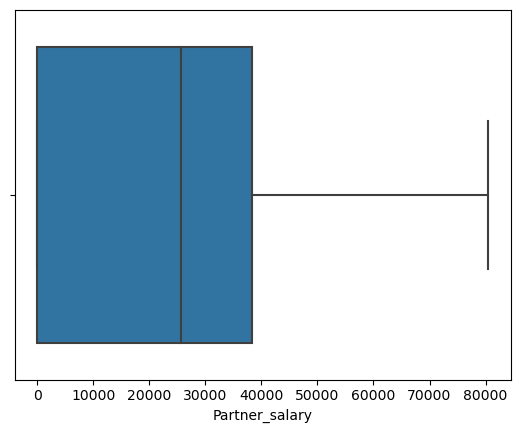

In [61]:
sns.boxplot(data=df, x='Partner_salary');

In [62]:
# Imputer with median strategy
imputer = SimpleImputer(strategy='mean')
df_copy[['Partner_salary']] = imputer.fit_transform(df_copy[['Partner_salary']])

In [63]:
df_copy.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

In [64]:
df_copy.to_csv('df_copy1.csv', index=False)

##### Other popular methods

| Method                                 | Description                                              |
| -------------------------------------- | -------------------------------------------------------- |
| `ffill()` / `bfill()`                  | Forward or backward fill values                          |
| Mode/Median Imputation                 | Use most frequent / median value                         |
| KNN Imputer (`KNNImputer`)             | Predict null values using nearest neighbors              |
| Iterative Imputer (`IterativeImputer`) | Uses regression models to predict missing values         |
| Drop missing (`dropna`)                | Drop rows/columns with missing values (when appropriate) |
| Domain-specific value                  | E.g., fill age with 0 only if 0 means "unknown"          |


## 3.4 Outliers Treatment

#### 1. Popular Methods for Outlier Detection & Treatment

| Method                           | Type         | Handles   | Robustness  | When to Use                   |
| -------------------------------- | ------------ | --------- | ----------- | ----------------------------- |
| **IQR (Interquartile Range)**    | Univariate   | Numerical | ✅ Robust    | Simple, small-medium datasets |
| **Z-Score**                      | Univariate   | Numerical | ❌ Sensitive | Normal-like distributions     |
| **Percentile Capping**           | Univariate   | Numerical | ✅ Robust    | Quick wins, business rules    |
| **Isolation Forest**             | Multivariate | Numerical | ✅ Good      | Large, high-dimensional data  |
| **DBSCAN (Clustering)**          | Multivariate | All       | ✅ Moderate  | Cluster-shaped datasets       |
| **Boxplots / Visual Inspection** | Univariate   | Numerical | Manual      | For EDA or small data         |
| **LOF (Local Outlier Factor)**   | Multivariate | All       | ✅ High      | Density-based outliers        |


In [65]:

df_copy2= pd.read_csv('df_copy1.csv')

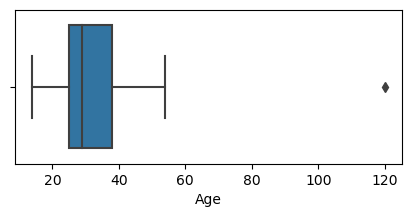

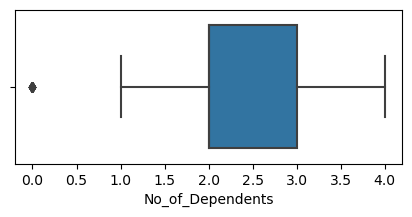

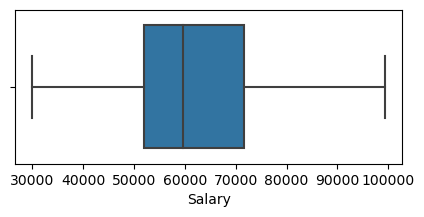

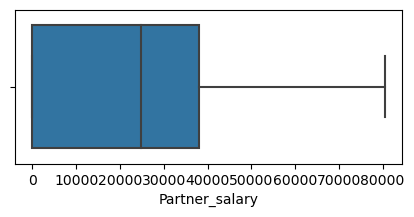

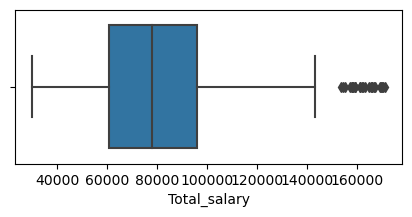

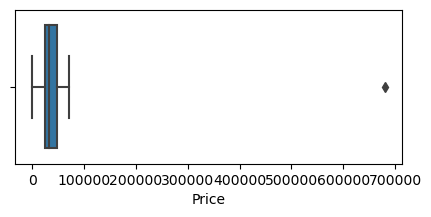

In [66]:
for i in df_copy2.select_dtypes(['int','float']).columns:
    plt.figure(figsize=(5,2))
    sns.boxplot(data=df_copy2,x=i);

In [67]:
# A.IQR Method (Interquartile Range)
Q1 = df_copy2['Age'].quantile(0.25)
Q3 = df_copy2['Age'].quantile(0.75)
IQR = Q3 - Q1
# Define bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower,upper

(5.5, 57.5)

In [68]:
# Filter out outliers
df_copy2[(df_copy2['Age'] <= lower) | (df_copy2['Age'] >= upper)]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
18,120,Female,Business,Married,Post Graduate,3,No,No,Yes,92600.0,70300.0,162900,58000,SUV


In [69]:
df_copy2['Age'].quantile(0.99)

53.0

In [70]:
df_copy2['Age'].describe()

count    1581.000000
mean       31.952562
std         8.712549
min        14.000000
25%        25.000000
50%        29.000000
75%        38.000000
max       120.000000
Name: Age, dtype: float64

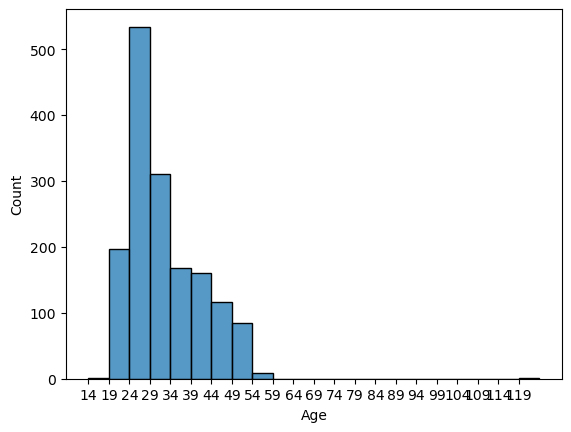

In [71]:
sns.histplot(data=df_copy2, x='Age',binwidth=5)
plt.xticks(np.arange(14,120,5));

In [72]:
df_copy2['Age'] =np.where(df_copy2['Age']<= lower,df_copy2['Age'].median(),df_copy2['Age'])
df_copy2['Age'] =np.where(df_copy2['Age']>= upper,df_copy2['Age'].median(),df_copy2['Age'])

In [73]:
 df_copy2[(df_copy2['Age'] <= lower) | (df_copy2['Age'] >= upper)]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


##### Note - We lately found a datapoint where age is 14 and this is not getting detected during outliers treatment. So we need to treat 'Age" manually here.

In [74]:
df_copy2['Age'] =np.where(df_copy2['Age'] ==14,29,df_copy2['Age'])

In [75]:
# B. Z-Score Method 
from scipy.stats import zscore
df_copy2['zscore'] = zscore(df_copy2['Price'])
df_copy2[df_copy2['zscore'].abs() > 3]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,zscore
26,46.0,Female,Salaried,Married,Post Graduate,3,No,No,Yes,81900.0,27800.0,109700,680000,SUV,30.42499


In [76]:
df_copy2['Price'].describe()

count      1581.000000
mean      35948.170778
std       21175.212108
min          58.000000
25%       25000.000000
50%       31000.000000
75%       47000.000000
max      680000.000000
Name: Price, dtype: float64

In [77]:
df_copy2['Price'].quantile(0.99)

68000.0

<Axes: xlabel='Price', ylabel='Count'>

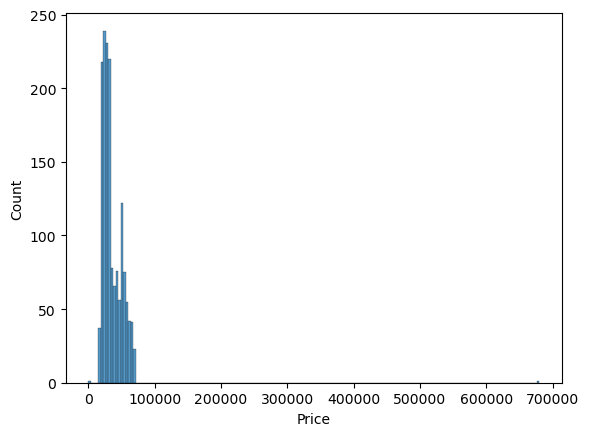

In [78]:
sns.histplot(data=df_copy2, x='Price')
#plt.xticks(np.arange(58,680000,1000));

In [79]:
df_copy2['Price'] =np.where(df_copy2['zscore'].abs()>3,df_copy2['Price'].median(),df_copy2['Price'])

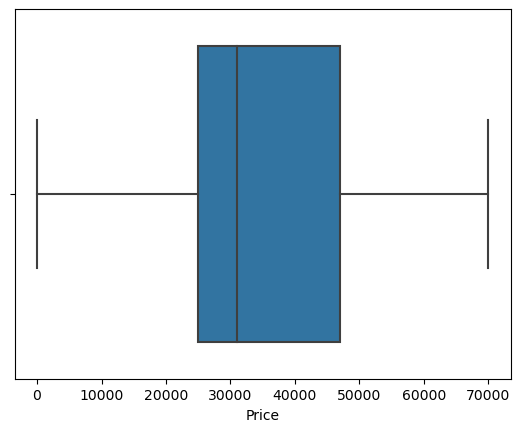

In [80]:
sns.boxplot(data=df_copy2, x='Price');

In [81]:
#Note- There is a value in price ==58 whcih is not detected 
#during outliers treatment so we will replace this with median
df_copy2['Price'] =np.where(df_copy2['Price']==58,df_copy2['Price'].median(),df_copy2['Price'])

In [82]:
# Treating outliers in Total_salary
Q1 = df_copy2['Total_salary'].quantile(0.25)
Q3 = df_copy2['Total_salary'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
lower,upper

(7400.0, 149000.0)

In [83]:
df_copy2[(df_copy2['Total_salary'] <= lower) | (df_copy2['Total_salary'] >= upper)]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,zscore
0,53.0,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.000000,170000,61000.0,SUV,1.183448
1,53.0,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.000000,165800,61000.0,SUV,1.183448
2,53.0,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.000000,158000,57000.0,SUV,0.994488
17,49.0,Female,Salaried,Married,Post Graduate,4,No,No,Yes,95100.0,70600.000000,165700,64000.0,SUV,1.325168
18,29.0,Female,Business,Married,Post Graduate,3,No,No,Yes,92600.0,70300.000000,162900,58000.0,SUV,1.041728
19,49.0,Male,Salaried,Married,Post Graduate,3,Yes,No,Yes,98400.0,60600.000000,159000,54000.0,SUV,0.852768
29,46.0,Female,Salaried,Married,Post Graduate,2,No,No,Yes,98300.0,70700.000000,169000,61000.0,SUV,1.183448
30,46.0,Male,Salaried,Married,Post Graduate,4,No,No,Yes,94900.0,70700.000000,165600,67000.0,SUV,1.466888
31,46.0,Male,Business,Married,Graduate,2,Yes,No,Yes,91100.0,70000.000000,161100,66000.0,SUV,1.419648
41,53.0,Female,Salaried,Married,Post Graduate,4,No,No,Yes,96600.0,70300.000000,166900,66000.0,SUV,1.419648


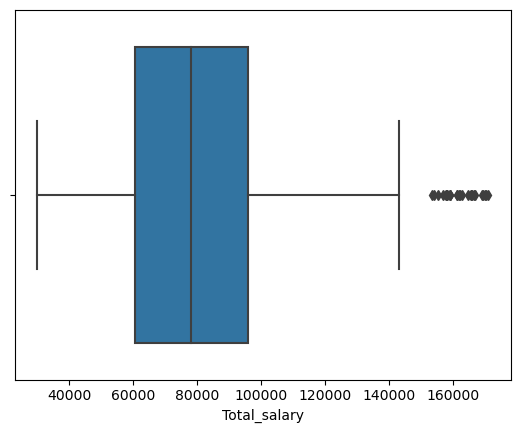

In [84]:
sns.boxplot(data=df_copy2, x='Total_salary');

In [85]:
df_copy2['Total_salary'] =np.where(df_copy2['Total_salary'] <= lower,lower,df_copy2['Total_salary'])
df_copy2['Total_salary'] =np.where(df_copy2['Total_salary'] >= upper,upper,df_copy2['Total_salary'])

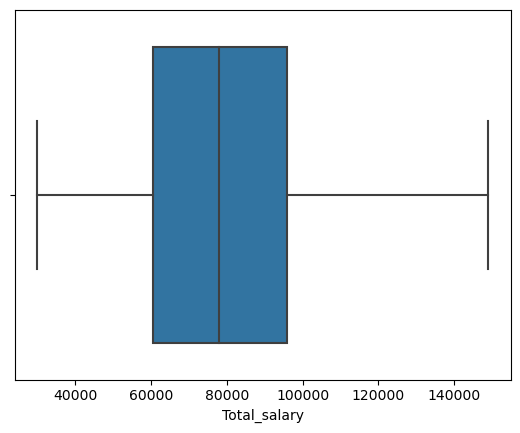

In [86]:
sns.boxplot(data=df_copy2, x='Total_salary');

In [87]:
df_copy2.drop('zscore',axis=1, inplace=True)
df_copy2.to_csv('df_copy3.csv', index=False)


#### C.Percentile Capping (Winsorization)
from scipy.stats.mstats import winsorize

Winsorize at 5th and 95th percentile

df['capped_age'] = winsorize(df['Age'], limits=[0.05, 0.05])

#### D. Isolation Forest (Multivariate)
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.1)

df['outlier'] = clf.fit_predict(df[['Age']])

df_filtered = df[df['outlier'] == 1]

print(df_filtered)

#### E.Local Outlier Factor (LOF)
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20)

df['outlier'] = lof.fit_predict(df[['Age']])

df_filtered = df[df['outlier'] == 1]

print(df_filtered)

##### Comparison Summary
| Method           | Speed     | Interpretability | Works on Multivariate | Scikit-learn Support |
| ---------------- | --------- | ---------------- | --------------------- | -------------------- |
| IQR              | ✅ Fast    | ✅ Easy           | ❌ No                  | ❌ No                 |
| Z-Score          | ✅ Fast    | ✅ Easy           | ❌ No                  | ❌ No                 |
| Winsorization    | ✅ Fast    | ✅ Easy           | ❌ No                  | ❌ No (in `scipy`)    |
| Isolation Forest | ⚠️ Slower | ✅ Moderate       | ✅ Yes                 | ✅ Yes                |
| LOF              | ⚠️ Slower | ⚠️ Hard          | ✅ Yes                 | ✅ Yes                |


## 3.5 Encoding 

Encoding is the process of converting categorical variables (text labels or categories) into a numerical format, so they can be used in machine learning models (which require numerical input).

Types of Categorical Variables
* Nominal – No natural order. E.g., Gender, Color, Country
* Ordinal – Has a meaningful order. E.g., Size (Small < Medium < Large), Rating (Low < Medium < High)

In [88]:
df_3= pd.read_csv('df_copy3.csv')

In [89]:
df_3.head(3)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53.0,Male,Business,Married,Post Graduate,4,No,No,Yes,99300.0,70700.0,149000.0,61000.0,SUV
1,53.0,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500.0,70300.0,149000.0,61000.0,SUV
2,53.0,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300.0,60700.0,149000.0,57000.0,SUV


In [90]:
cat_variables= df_3.select_dtypes('object')
num_variables= df_3.select_dtypes(['int','float'])


In [91]:
cat_variables.columns

Index(['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan',
       'House_loan', 'Partner_working', 'Make'],
      dtype='object')

In [92]:
cat_variables.head(3)

,Gender,Profession,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make
0,Male,Business,Married,Post Graduate,No,No,Yes,SUV
1,Female,Salaried,Married,Post Graduate,Yes,No,Yes,SUV
2,Female,Salaried,Married,Post Graduate,No,No,Yes,SUV


#### Note
* Nominal features with low cardinality ===>> Gender, Profession, Marital_status,Personal_loan,House_loan,Partner_working,Make
* Nominal features with high cardinality ===>> No feature
* Ordinal features ===>> Education

In [93]:
pd.Categorical(cat_variables['Education'],ordered= True,categories=['Graduate','Post Graduate'])

['Post Graduate', 'Post Graduate', 'Post Graduate', 'Graduate', 'Post Graduate', ..., 'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate']
Length: 1581
Categories (2, object): ['Graduate' < 'Post Graduate']

In [94]:
pd.Categorical(cat_variables['Education'],ordered= True).codes

array([1, 1, 1, ..., 0, 0, 0], dtype=int8)

In [95]:
# 1. Ordinal encoding
print(pd.Categorical(cat_variables['Education'],ordered= True, categories=['Graduate','Post Graduate']))
print(pd.Categorical(cat_variables['Education'],ordered= True, categories=['Graduate','Post Graduate']).codes)
cat_variables['Education']=pd.Categorical(cat_variables['Education'],ordered= True, categories=['Graduate','Post Graduate']).codes

['Post Graduate', 'Post Graduate', 'Post Graduate', 'Graduate', 'Post Graduate', ..., 'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Graduate']
Length: 1581
Categories (2, object): ['Graduate' < 'Post Graduate']
[1 1 1 ... 0 0 0]


In [96]:
cat_variables['Education'].value_counts()

Education
1    985
0    596
Name: count, dtype: int64

In [97]:
cat_variables.head()

,Gender,Profession,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make
0,Male,Business,Married,1,No,No,Yes,SUV
1,Female,Salaried,Married,1,Yes,No,Yes,SUV
2,Female,Salaried,Married,1,No,No,Yes,SUV
3,Female,Salaried,Married,0,Yes,No,Sedan,Sedan
4,Male,Salaried,Married,1,No,No,Yes,SUV


In [98]:
pd.Categorical(cat_variables["Marital_status"],ordered= False).codes

array([0, 0, 0, ..., 1, 0, 0], dtype=int8)

In [99]:
# 2. Nominal encoding
nominal_features=['Marital_status','Personal_loan','House_loan','Partner_working','Make']
for i in nominal_features:
    print(i,";")
    print(pd.Categorical(cat_variables[i],ordered= False))
    print(pd.Categorical(cat_variables[i],ordered= False).codes)
    print('----------------------------------------')
    cat_variables[i]=pd.Categorical(cat_variables[i],ordered= False).codes

Marital_status ;
['Married', 'Married', 'Married', 'Married', 'Married', ..., 'Single', 'Married', 'Single', 'Married', 'Married']
Length: 1581
Categories (2, object): ['Married', 'Single']
[0 0 0 ... 1 0 0]
----------------------------------------
Personal_loan ;
['No', 'Yes', 'No', 'Yes', 'No', ..., 'No', 'No', 'No', 'Yes', 'No']
Length: 1581
Categories (2, object): ['No', 'Yes']
[0 1 0 ... 0 1 0]
----------------------------------------
House_loan ;
['No', 'No', 'No', 'No', 'No', ..., 'Yes', 'No', 'Yes', 'Yes', 'No']
Length: 1581
Categories (2, object): ['No', 'Yes']
[0 0 0 ... 1 1 0]
----------------------------------------
Partner_working ;
['Yes', 'Yes', 'Yes', 'Sedan', 'Yes', ..., 'No', 'No', 'No', 'No', 'No']
Length: 1581
Categories (4, object): ['Hatchback', 'No', 'Sedan', 'Yes']
[3 3 3 ... 1 1 1]
----------------------------------------
Make ;
['SUV', 'SUV', 'SUV', 'Sedan', 'SUV', ..., 'Hatchback', 'Hatchback', 'Hatchback', 'Hatchback', 'Hatchback']
Length: 1581
Categories (3

In [100]:
cat_variables["Make"].value_counts()

Make
2    704
0    582
1    295
Name: count, dtype: int64

In [101]:
df_3["Make"].value_counts()

Make
Sedan        704
Hatchback    582
SUV          295
Name: count, dtype: int64

In [102]:
pd.get_dummies(cat_variables[['Gender']],dtype='int')

,Gender_Female,Gender_Male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
1576,0,1
1577,0,1
1578,0,1
1579,0,1


In [103]:
# 3. One Hot encoding
pd.get_dummies(cat_variables[['Gender','Profession']],dtype='int')

,Gender_Female,Gender_Male,Profession_Business,Profession_Salaried
0,0,1,1,0
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,0,1,0,1
...,...,...,...,...
1576,0,1,0,1
1577,0,1,1,0
1578,0,1,1,0
1579,0,1,1,0


In [104]:
for i in ['Gender','Profession']:
    print(pd.get_dummies(cat_variables[i],dtype='int'))

      Female  Male
0          0     1
1          1     0
2          1     0
3          1     0
4          0     1
...      ...   ...
1576       0     1
1577       0     1
1578       0     1
1579       0     1
1580       0     1

[1581 rows x 2 columns]
      Business  Salaried
0            1         0
1            0         1
2            0         1
3            0         1
4            0         1
...        ...       ...
1576         0         1
1577         1         0
1578         1         0
1579         1         0
1580         0         1

[1581 rows x 2 columns]


In [105]:
cat_variables.head(2)

,Gender,Profession,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make
0,Male,Business,0,1,0,0,3,1
1,Female,Salaried,0,1,1,0,3,1


In [106]:
cat_variables_encoded= pd.get_dummies(cat_variables, columns=['Gender','Profession'], dtype=int)

In [107]:
cat_variables_encoded.head()

,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make,Gender_Female,Gender_Male,Profession_Business,Profession_Salaried
0,0,1,0,0,3,1,0,1,1,0
1,0,1,1,0,3,1,1,0,0,1
2,0,1,0,0,3,1,1,0,0,1
3,0,0,1,0,2,2,1,0,0,1
4,0,1,0,0,3,1,0,1,0,1


In [108]:
df_encoded=pd.concat([num_variables,cat_variables_encoded], axis=1,)
df_encoded.head()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make,Gender_Female,Gender_Male,Profession_Business,Profession_Salaried
0,53.0,4,99300.0,70700.0,149000.0,61000.0,0,1,0,0,3,1,0,1,1,0
1,53.0,4,95500.0,70300.0,149000.0,61000.0,0,1,1,0,3,1,1,0,0,1
2,53.0,3,97300.0,60700.0,149000.0,57000.0,0,1,0,0,3,1,1,0,0,1
3,53.0,3,72500.0,70300.0,142800.0,61000.0,0,0,1,0,2,2,1,0,0,1
4,53.0,3,79700.0,60200.0,139900.0,57000.0,0,1,0,0,3,1,0,1,0,1


In [109]:
df_encoded.to_csv('df_encoded', index=False)

##### Common encoding techniques:
| Encoding Method      | Type of Data | Pros                  | Cons                             |
| -------------------- | ------------ | --------------------- | -------------------------------- |
| Label Encoding       | Ordinal      | Simple                | Imposes order on nominal data    |
| One-Hot Encoding     | Nominal      | No order imposed      | High dimensionality              |
| Ordinal Encoding     | Ordinal      | Preserves order       | You must define the order        |
| Frequency Encoding   | Nominal      | Simple, compact       | May mislead the model            |
| Target/Mean Encoding | Nominal      | Can boost performance | Risk of overfitting/data leakage |


#### Difference in `pd.Categorical` technique and Sklearn's `LabelEncoder` / `OrdinalEncoder`
| Feature                    | `pd.Categorical`      | `LabelEncoder` / `OrdinalEncoder` |
| -------------------------- | --------------------- | --------------------------------- |
| Built into Pandas          | ✅ Yes                 | ❌ No                              |
| Easy for quick exploration | ✅ Very                | ➖ Slightly more verbose           |
| Custom category ordering   | ✅ Yes                 | ✅ Yes                             |
| Part of sklearn pipelines  | ❌ Not natively        | ✅ Integrates well                 |
| Handles unknown values     | ❌ Fails or assigns -1 | ✅ Can handle with parameters      |


## 3.6 Train Test Split (Required when building model for predictions)
#### What is train_test_split?
train_test_split is a function from scikit-learn used to split your dataset into two parts:

Training set – to train the model

Validation set – to evaluate the model's performance

#### Why is it required?
When building machine learning models, we train the model on one portion of the data and test it on unseen data to check how well it generalizes.

This prevents overfitting and gives a fair estimate of model accuracy.

In [110]:
df_TrainTestSplit= pd.read_csv('df_encoded')

In [111]:
df_TrainTestSplit.isnull().sum()

Age                    0
No_of_Dependents       0
Salary                 0
Partner_salary         0
Total_salary           0
Price                  0
Marital_status         0
Education              0
Personal_loan          0
House_loan             0
Partner_working        0
Make                   0
Gender_Female          0
Gender_Male            0
Profession_Business    0
Profession_Salaried    0
dtype: int64

In [112]:
df_TrainTestSplit.head()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make,Gender_Female,Gender_Male,Profession_Business,Profession_Salaried
0,53.0,4,99300.0,70700.0,149000.0,61000.0,0,1,0,0,3,1,0,1,1,0
1,53.0,4,95500.0,70300.0,149000.0,61000.0,0,1,1,0,3,1,1,0,0,1
2,53.0,3,97300.0,60700.0,149000.0,57000.0,0,1,0,0,3,1,1,0,0,1
3,53.0,3,72500.0,70300.0,142800.0,61000.0,0,0,1,0,2,2,1,0,0,1
4,53.0,3,79700.0,60200.0,139900.0,57000.0,0,1,0,0,3,1,0,1,0,1


#### Separating Features and Target

In [113]:
X = df_TrainTestSplit.drop('Price', axis=1)  
y = df_TrainTestSplit['Price']              


In [114]:
X.head()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make,Gender_Female,Gender_Male,Profession_Business,Profession_Salaried
0,53.0,4,99300.0,70700.0,149000.0,0,1,0,0,3,1,0,1,1,0
1,53.0,4,95500.0,70300.0,149000.0,0,1,1,0,3,1,1,0,0,1
2,53.0,3,97300.0,60700.0,149000.0,0,1,0,0,3,1,1,0,0,1
3,53.0,3,72500.0,70300.0,142800.0,0,0,1,0,2,2,1,0,0,1
4,53.0,3,79700.0,60200.0,139900.0,0,1,0,0,3,1,0,1,0,1


In [115]:
y

0       61000.0
1       61000.0
2       57000.0
3       61000.0
4       57000.0
         ...   
1576    27000.0
1577    31000.0
1578    30000.0
1579    24000.0
1580    31000.0
Name: Price, Length: 1581, dtype: float64

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2,random_state=20)     

## 3.7 Scaling
* Why Feature Scaling is Important:

Many machine learning algorithms (like KNN, SVM, Gradient Descent-based models, Neural Networks) compute distances or rely on the magnitude of features. If one feature has a large range and another has a small range, the model might become biased toward the feature with the larger range.

##### Most common techniques:
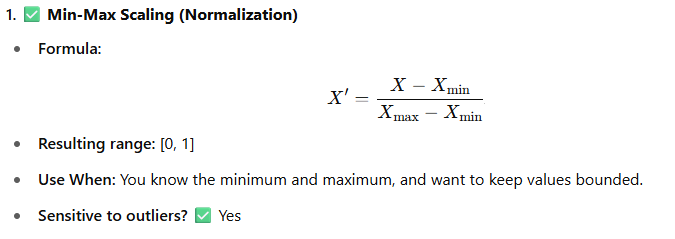
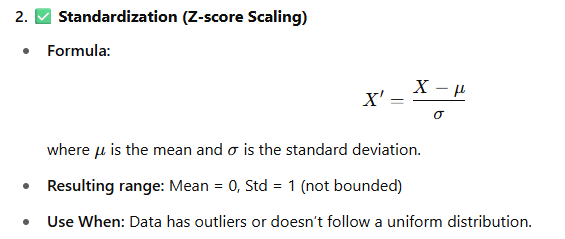

In [117]:
cat_cols=['No_of_Dependents', 'Marital_status', 'Education', 'Personal_loan', 'House_loan',
 'Partner_working', 'Make', 'Gender_Female', 'Gender_Male','Profession_Business', 'Profession_Salaried']
num_cols= ['Age','Salary', 'Partner_salary', 'Total_salary']

In [118]:
# 1. Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
MMscaler = MinMaxScaler()
Xtrain_scaled_MinMax = MMscaler.fit_transform(X_train[num_cols])
Xval_scaled_MinMax = MMscaler.transform(X_val[num_cols])

In [119]:
Xtrain_scaled_MinMax=pd.DataFrame(Xtrain_scaled_MinMax,columns=X_train[num_cols].columns)
Xval_scaled_MinMax=pd.DataFrame(Xval_scaled_MinMax,columns=X_val[num_cols].columns)

In [120]:
Xtrain_scaled_MinMax.head(2)

,Age,Salary,Partner_salary,Total_salary
0,0.43750,0.392496,0.0,0.228571
1,0.71875,0.367965,0.0,0.214286


In [121]:
X_train.head(2)

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make,Gender_Female,Gender_Male,Profession_Business,Profession_Salaried
467,36.0,1,57200.0,0.0,57200.0,0,0,0,0,1,2,1,0,0,1
166,45.0,4,55500.0,0.0,55500.0,0,0,0,0,1,1,0,1,1,0


In [122]:
(36-X_val['Age'].min())/(X_val['Age'].max()-X_val['Age'].min())

0.4375

In [123]:
Xtrain_scaled_MinMax.describe()

,Age,Salary,Partner_salary,Total_salary
count,1264.000000,1264.000000,1264.000000,1264.000000
mean,0.310052,0.439693,0.283954,0.416211
std,0.265248,0.209447,0.265899,0.207837
min,0.000000,0.000000,0.000000,0.000000
25%,0.093750,0.317460,0.000000,0.260294
50%,0.218750,0.430014,0.347673,0.404202
75%,0.500000,0.601732,0.505289,0.554832
max,1.000000,1.000000,1.000000,1.000000


In [124]:
# 2. z-score Scaling (standardization)
from sklearn.preprocessing import StandardScaler
SSscaler = StandardScaler()
Xtrain_scaled_StandardScalar = SSscaler.fit_transform(X_train[num_cols])
Xval_scaled_StandardScalar = SSscaler.transform(X_val[num_cols])

In [125]:
Xtrain_scaled_StandardScalar=pd.DataFrame(Xtrain_scaled_StandardScalar,columns=X_train[num_cols].columns)
Xval_scaled_StandardScalar=pd.DataFrame(Xval_scaled_StandardScalar,columns=X_val[num_cols].columns)

In [126]:
round(Xtrain_scaled_StandardScalar.describe(),2)

,Age,Salary,Partner_salary,Total_salary
count,1264.00,1264.00,1264.00,1264.00
mean,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00
min,-1.17,-2.10,-1.07,-2.00
25%,-0.82,-0.58,-1.07,-0.75
50%,-0.34,-0.05,0.24,-0.06
75%,0.72,0.77,0.83,0.67
max,2.60,2.68,2.69,2.81


In [127]:
X_train[num_cols].head(2)

,Age,Salary,Partner_salary,Total_salary
467,36.0,57200.0,0.0,57200.0
166,45.0,55500.0,0.0,55500.0


In [128]:
Xtrain_scaled_StandardScalar.head(2)

,Age,Salary,Partner_salary,Total_salary
0,0.480674,-0.225427,-1.068322,-0.903177
1,1.541420,-0.342596,-1.068322,-0.971940


In [129]:
(45- X_train['Age'].mean())/X_train['Age'].std()

1.5408102120465617

In [130]:
Xtrain_scaled_StandardScalar.shape

(1264, 4)

In [131]:
X_train[cat_cols].shape

(1264, 11)

In [132]:
X_train[cat_cols].reset_index(drop=True)

,No_of_Dependents,Marital_status,Education,Personal_loan,House_loan,Partner_working,Make,Gender_Female,Gender_Male,Profession_Business,Profession_Salaried
0,1,0,0,0,0,1,2,1,0,0,1
1,4,0,0,0,0,1,1,0,1,1,0
2,2,1,1,0,0,1,1,0,1,1,0
3,2,1,0,0,0,1,1,1,0,0,1
4,2,0,1,1,0,1,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1259,3,0,0,1,1,3,0,0,1,0,1
1260,3,0,1,0,0,1,0,0,1,0,1
1261,1,0,0,1,1,1,2,1,0,0,1
1262,4,0,1,0,0,3,1,1,0,1,0


In [133]:
scaled_train=pd.concat([Xtrain_scaled_StandardScalar,X_train[cat_cols].reset_index(drop=True)],axis=1)
scaled_test=pd.concat([Xval_scaled_StandardScalar,X_val[cat_cols].reset_index(drop=True)],axis=1)

In [134]:
scaled_train.to_csv('Scaled_data_train',index=False)
scaled_test.to_csv('Scaled_data_val',index=False)

# 4-Model Building (Regression), Evaluation & Tuning

### 4.1 Regression algorithms
    * Linear Regression
    * KNN
    * Decision Trees (CART)
    * Random Forest
    * Boosting
        * Adaboost,
        * Gboost,
        * XGboost
### 4.2 Model Evaluation: Regression metrics: R² & RMSE 
1. R-squared (R²) — Coefficient of Determination
    * What it means:
        * Measures how well the model explains the variability in the target variable.
        * Value lies between 0 and 1 (can be negative if model performs worse than the mean).
    * Interpretation:
        * R² = 1 → perfect prediction
        * R² = 0 → model is no better than the average
        * Higher is better
          ![image.png](attachment:e23679fd-3fe1-4ef2-b9e9-1dfed173e585.png)

2. RMSE — Root Mean Squared Error
    * What it means:
        * Measures average prediction error in the same units as the target variable.
        * It gives more weight to larger errors.
    * Interpretation:
        * Lower is better
        * Easy to interpret because it’s in the same unit as 
          ![image.png](attachment:65110f95-03fd-4549-be04-631970e6b345.png)
### 4.3 Model Tuning
    * GridSearchCV
    * Hyper Parameter Tuning


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
#pip install xgboost
from xgboost import XGBRegressor

In [7]:
# loading the encoded data
df_TrainTestSplit= pd.read_csv('df_encoded')

#seperating the target variable from rest of the data
X = df_TrainTestSplit.drop('Price', axis=1)  
y = df_TrainTestSplit['Price'] 

# Splitting the data into train & validation set
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2,random_state=20) 

# Lodaing the scaled data sets
x_trainFinal= pd.read_csv('Scaled_data_train')
x_valFinal= pd.read_csv('Scaled_data_val')

In [8]:
# Building a Linear regression model
LR = LinearRegression()
LR.fit(x_trainFinal,y_train)
y_train_pred = LR.predict(x_trainFinal)
y_val_pred = LR.predict(x_valFinal)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)
print("Train RMSE",rmse_train,"| Train R2",r2_train)
print('Test RMSE',rmse_val,'| Test R2',r2_val)

Train RMSE 7570.981641910902 | Train R2 0.6918619142580861
Test RMSE 7980.332383856062 | Test R2 0.6460844787029485


In [9]:
# Building a knn model
knn = KNeighborsRegressor()
knn.fit(x_trainFinal,y_train)
y_train_pred = knn.predict(x_trainFinal)
y_val_pred = knn.predict(x_valFinal)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)
print("Train RMSE",rmse_train,"| Train R2",r2_train)
print('Test RMSE',rmse_val,'| Test R2',r2_val)

Train RMSE 5210.068149898068 | Train R2 0.8540756383273901
Test RMSE 6711.288103830612 | Test R2 0.7496950637629545


##### Building various models and comparing their performance

In [10]:
models = {
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}

In [11]:
results = []
for name, model in models.items():
    model.fit(x_trainFinal, y_train)

    # Predictions
    y_train_pred = model.predict(x_trainFinal)
    y_val_pred = model.predict(x_valFinal)

    # Metrics
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)

    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2_val = r2_score(y_val, y_val_pred)

    # Store result
    results.append({
        "Model": name,
        "Train_RMSE": rmse_train,
        "Train_R²": r2_train,
        "Val_RMSE": rmse_val,
        "Val_R²": r2_val
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Show results sorted by Validation RMSE
results_df

,Model,Train_RMSE,Train_R²,Val_RMSE,Val_R²
0,Linear Regression,7570.981642,0.691862,7980.332384,0.646084
1,KNN,5210.068150,0.854076,6711.288104,0.749695
2,Decision Tree,119.333593,0.999923,8209.020198,0.625510
3,Random Forest,2136.167255,0.975469,5769.098197,0.815042
4,AdaBoost,5957.288229,0.809218,6377.139084,0.773999
5,Gradient Boosting,4760.218249,0.878187,5854.956125,0.809496
6,XGBoost,1070.193550,0.993843,6470.026101,0.767368


#### Using K-Fold Cross Validation (e.g. cv=5) to make models work better

In [12]:
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = []

for name, model in models.items():
    # Cross-validation scores (negative RMSE)
    neg_mse_scores = cross_val_score(model, x_trainFinal, y_train, scoring='neg_root_mean_squared_error', cv=cv)
    r2_scores = cross_val_score(model, x_trainFinal, y_train, scoring='r2', cv=cv)

    cv_rmse_mean = -np.mean(neg_mse_scores)
    cv_r2_mean = np.mean(r2_scores)

    # Train model on full training data
    model.fit(x_trainFinal, y_train)

    # Predict on validation set
    y_val_pred = model.predict(x_valFinal)

    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_r2 = r2_score(y_val, y_val_pred)

    results.append({
        "Model": name,
        "CV_RMSE_(Train)": cv_rmse_mean,
        "CV_R²_(Train)": cv_r2_mean,
        "Val_RMSE": val_rmse,
        "Val_R²": val_r2
    })

# Display final results
results_df = pd.DataFrame(results)
results_df

,Model,CV_RMSE_(Train),CV_R²_(Train),Val_RMSE,Val_R²
0,Linear Regression,7672.637680,0.679311,7980.332384,0.646084
1,KNN,6631.653970,0.760831,6711.288104,0.749695
2,Decision Tree,7641.303679,0.687243,8250.609384,0.621706
3,Random Forest,5769.959248,0.820064,5731.434175,0.817449
4,AdaBoost,6265.563141,0.785208,6297.345694,0.779620
5,Gradient Boosting,5726.601278,0.822772,5860.311571,0.809147
6,XGBoost,6029.030882,0.803133,6470.026101,0.767368


#### Note Why we use "neg_root_mean_squared_error" in cross_val_score:
* The issue: cross_val_score() in scikit-learn is designed so that higher scores are better.
* But: RMSE (Root Mean Squared Error) is a loss function – lower is better.
* So, scikit-learn returns the negative of RMSE to keep all scorers consistent (maximize = better).

### Model tuning (Hyper parameter Tuning)

In [13]:
from sklearn.model_selection import GridSearchCV
# Define the model
rf_model = RandomForestRegressor()
# Define hyperparameter grid
param_grid = {"n_estimators": [50, 100, 150],"max_depth": [None, 10, 20],
              "min_samples_split": [2, 5, 10]}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # RMSE as negative (as required by sklearn)
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_search.fit(x_trainFinal, y_train)

# Best model
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

# Train performance
y_train_pred = best_rf.predict(x_trainFinal)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Validation performance
y_val_pred = best_rf.predict(x_valFinal)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

# Print results
print("Best Hyperparameters for Random Forest:")
print(best_params)

print("\n Performance Metrics:")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R²   : {train_r2:.4f}")
print(f"Val RMSE   : {val_rmse:.4f}")
print(f"Val R²     : {val_r2:.4f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters for Random Forest:
{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}

 Performance Metrics:
Train RMSE: 3869.2662
Train R²   : 0.9195
Val RMSE   : 5741.8714
Val R²     : 0.8168


In [14]:
# Define model
ada_model = AdaBoostRegressor(random_state=42)

# Define parameter grid
param_grid_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Grid search
grid_ada = GridSearchCV(
    estimator=ada_model,
    param_grid=param_grid_ada,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_ada.fit(x_trainFinal, y_train)

# Best model and params
best_ada = grid_ada.best_estimator_
best_ada_params = grid_ada.best_params_

# Train evaluation
y_train_pred = best_ada.predict(x_trainFinal)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Validation evaluation
y_val_pred = best_ada.predict(x_valFinal)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

# Output
print(" Best Hyperparameters for AdaBoost:")
print(best_ada_params)

print("\n AdaBoost Performance:")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R²   : {train_r2:.4f}")
print(f"Val RMSE   : {val_rmse:.4f}")
print(f"Val R²     : {val_r2:.4f}")


Fitting 5 folds for each of 9 candidates, totalling 45 fits
 Best Hyperparameters for AdaBoost:
{'learning_rate': 0.1, 'n_estimators': 100}

 AdaBoost Performance:
Train RMSE: 5868.4603
Train R²   : 0.8149
Val RMSE   : 6229.1798
Val R²     : 0.7844


In [15]:
# Define model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define parameter grid
param_grid_xgb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Grid search
grid_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit model
grid_xgb.fit(x_trainFinal, y_train)

# Best model and params
best_xgb = grid_xgb.best_estimator_
best_xgb_params = grid_xgb.best_params_

# Train evaluation
y_train_pred = best_xgb.predict(x_trainFinal)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Validation evaluation
y_val_pred = best_xgb.predict(x_valFinal)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

# Output
print(" Best Hyperparameters for XGBoost:")
print(best_xgb_params)

print("\n XGBoost Performance:")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Train R²   : {train_r2:.4f}")
print(f"Val RMSE   : {val_rmse:.4f}")
print(f"Val R²     : {val_r2:.4f}")


Fitting 5 folds for each of 18 candidates, totalling 90 fits
 Best Hyperparameters for XGBoost:
{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}

 XGBoost Performance:
Train RMSE: 4169.5696
Train R²   : 0.9065
Val RMSE   : 5957.3645
Val R²     : 0.8028


# 5-Model Building (Classification), Evaluation & Tuning
* Data splitting
* Classification algorithms
    * Logistic Regression
    * Naive Bayes, KNN
    * Decision Trees (CART)
    * Random Forest
    * Boosting - Adaboost, Gboost, XGboost
* Model Evaluation
    * Classification metrics:Accuracy, Precision, Recall, F1-score, Confusion matrix,ROC Curve, AUC
* Model Tuning
    * GridSearchCV
    * RandomSearchCV

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
#pip install xgboost
from xgboost import XGBClassifier

In [17]:
df_3= pd.read_csv('df_copy3.csv')

cat_variables= df_3.select_dtypes('object')
num_variables= df_3.select_dtypes(['int','float'])

In [18]:
# 1. Ordinal Encoding
cat_variables['Education']=pd.Categorical(cat_variables['Education'],ordered= True, 
                                          categories=['Graduate','Post Graduate']).codes

# 2. Nominal Encoding
nominal_features=['Marital_status','Personal_loan','House_loan','Partner_working','Make']
for i in nominal_features:
    cat_variables[i]=pd.Categorical(cat_variables[i],ordered= False).codes
    
# 3. One Hot  Encoding
cat_variables_encoded= pd.get_dummies(cat_variables, columns=['Gender','Profession'], dtype=int)

# Concatinating the encoded part and numerical variables
df_encoded=pd.concat([num_variables,cat_variables_encoded], axis=1,)
df_encoded.to_csv('df_encoded_classification', index=False)

In [19]:
# loading the encoded data
df_TrainTestSplit= pd.read_csv('df_encoded_classification')

#seperating the target variable from rest of the data
X = df_TrainTestSplit.drop('Make', axis=1)  
y = df_TrainTestSplit['Make'] 

# Splitting the data into train & validation set
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.2,random_state=20) 

cat_cols=['No_of_Dependents', 'Marital_status', 'Education', 'Personal_loan', 'House_loan',
 'Partner_working','Gender_Female', 'Gender_Male','Profession_Business', 'Profession_Salaried']
num_cols= ['Age','Salary', 'Partner_salary', 'Total_salary', 'Price']

from sklearn.preprocessing import StandardScaler
SSscaler = StandardScaler()
Xtrain_scaled_StandardScalar = SSscaler.fit_transform(X_train[num_cols])
Xval_scaled_StandardScalar = SSscaler.transform(X_val[num_cols])

Xtrain_scaled_StandardScalar=pd.DataFrame(Xtrain_scaled_StandardScalar,columns=X_train[num_cols].columns)
Xval_scaled_StandardScalar=pd.DataFrame(Xval_scaled_StandardScalar,columns=X_val[num_cols].columns)

In [23]:
Xtrain_scaled_StandardScalar.head()

,Age,Salary,Partner_salary,Total_salary,Price
0,0.480674,-0.225427,-1.068322,-0.903177,0.911855
1,1.541420,-0.342596,-1.068322,-0.971940,1.865011
2,2.366445,2.028359,-1.068322,0.419486,1.938331
3,1.187838,-0.466658,-1.068322,-1.044747,2.011650
4,0.127092,-0.087581,-1.068322,-0.822281,1.058495


In [25]:
gb=GradientBoostingClassifier()
gb.fit(Xtrain_scaled_StandardScalar,y_train)
preds_train=gb.predict(Xtrain_scaled_StandardScalar)
preds_val=gb.predict(Xval_scaled_StandardScalar)
print(classification_report(y_train,preds_train))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       471
           1       0.98      0.84      0.90       244
           2       0.89      0.86      0.87       549

    accuracy                           0.89      1264
   macro avg       0.91      0.89      0.89      1264
weighted avg       0.90      0.89      0.89      1264



In [22]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier()
}

results = []
for name, model in models.items():
    model.fit(Xtrain_scaled_StandardScalar, y_train)

    # Predictions
    y_train_pred = model.predict(Xtrain_scaled_StandardScalar)
    y_val_pred = model.predict(Xval_scaled_StandardScalar)

    # Metrics
    Accuracy_train = accuracy_score(y_train, y_train_pred)
    #Precision_train = precision_score(y_train, y_train_pred,average=None)
    #Recall_train = recall_score(y_train, y_train_pred,average=None)
    #F1_score_train = f1_score(y_train, y_train_pred,average=None)

    Accuracy_val = accuracy_score(y_val, y_val_pred)
    #Precision_test = precision_score(y_val, y_val_pred,average=None)
    #Recall_test = recall_score(y_val, y_val_pred,average=None)
    #F1_score_test = f1_score(y_val, y_val_pred,average=None)

    # Store result
    results.append({
        "Model": name,
        "Accuracy_train": Accuracy_train,
        "Accuracy_val": Accuracy_val,
        #"Precision_train": Precision_train,
        #"Precision_test": Precision_test,
        #"Recall_train": Recall_train,
        #"Recall_test" : Recall_test,
        #"F1_score_train": F1_score_train,
        #"F1_score_test" : F1_score_test
        
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Show results sorted by Validation RMSE
results_df

,Model,Accuracy_train,Accuracy_val
0,Logistic Regression,0.697785,0.728707
1,KNN,0.800633,0.760252
2,Decision Tree,1.000000,0.747634
3,Random Forest,1.000000,0.807571
4,AdaBoost,0.572785,0.586751
5,Gradient Boosting,0.891614,0.820189
6,XGBoost,1.000000,0.801262
